<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Team2_Dojo_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
songdata = pd.read_csv("https://raw.githubusercontent.com/temunix2/Book2Playlist/master/songdata.csv")
display(songdata.head())
songdata.info()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


# Dojo Start

**Task:** Count the number of songs for every artist. Return the 5 artists with the most songs together with their number of songs.

Hint: You can do this with pandas

In [ ]:
#grouped=songdata.groupby(by='artist').count()
grouped.sort_values(by='song',ascending=False)

**Task:** Create a histogram with the number of words in each song.

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#freqs=pd.DataFrame.from_dict(nltk.FreqDist(words),orient='index',columns=['freq'])
#words=nltk.word_tokenize(text)
songdata['wordcount']=songdata['text'].apply(lambda x: len(x.split(' ')))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


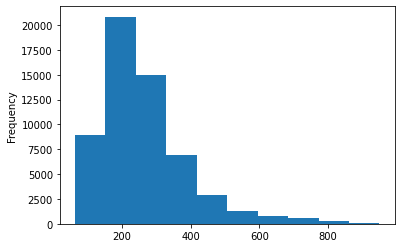

In [18]:
songdata['wordcount'].plot.hist()

## Regular Expressions

**Task:** Count the number of songs that mention the year "1990" in their lyrics. Do this **without** using a regular expression.

*Hint:* It should be 7 songs.

In [22]:
len(songdata[songdata['text'].str.contains('1990')])

7

**Task:** Now, use a regular expression to count the number of songs mentioning any year in the nineties, e.g. 1991, 1995, etc. or even mentioning '90s' or 'nineties' directly. 

*Hint*: It should be 123 songs.
You can do this either by for-looping over the dataset and using the `re` package, or by using pandas functionality.

In [28]:
len(songdata[songdata['text'].str.contains('199[0-9]|nineties|90s',regex=True,na=False)])


selection=songdata[songdata['text'].str.contains('199[0-9]|nineties|90s',regex=True,na=False)]['text']
songlist=selection.values.tolist()
songs=' '.join(songlist)

In [50]:
import re
nineties=[]
for i in ['199[0-9]{1}','nineties','90s']:
  se=f'{i}'
  nineties.extend(re.findall(se,songs))
ninetykeys=list(set(nineties))
countdict={}
for k in ninetykeys:
  count=0
  for i in nineties:
    if i==k:
      count+=1
  countdict[k]=count
print(countdict)

{'1995': 14, '1998': 10, '1997': 8, '90s': 4, '1994': 16, '1992': 16, 'nineties': 9, '1999': 42, '1996': 16, '1993': 7, '1990': 7, '1991': 11}


In [ ]:
songdata[songdata['text'].str.contains('1991')]

**Bonus:** In the previous exercise you counted the number of songs containing any match to the regex pattern. Now, **count** the number of times **each distinct match** was found, i.e. the result of this task should be a dictionary of the following form:
```
{"1990": 7,
 "1991": 6,
 "1992": 2,
 ...
 "90s": ...,
 "nineties": ...
}
```

## Text Understanding

Now, we want to get a better understanding of what our lyrics are generally about. We do that by plotting wordclouds!

**Task:** First, grab a random sample song with it's artist and title and put it in a variable. The print the artist as well as the title of the song.

In [58]:
samplesong=songdata.iloc[0,:]
print(samplesong.values[0:2])

['ABBA' "Ahe's My Kind Of Girl"]


**Task:** Import WordCloud from the wordcloud python package and use the `generate` function of the WordCloud object on your sample song.

Then, use `plt.imshow()` with the result that was returned by the generate function and set the title of this plot to the title and artist of the song.

*If you want to make it prettier, adjust the plot size (and width, height of WordCloud) and turn the axes off.*

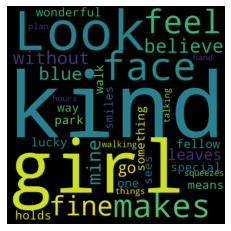

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)

# Generation of the wordcloud from a text
wordcloud.generate_from_text(samplesong['text'])

# Display thanks to Matplotlib
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Predicting Artists

Many artists have too few songs to do anything with, so let's see if we can predict any of the artists that we have more songs of.

**Task:** First extract the 10 artists that have the most songs in the dataset. Who are they? Then extract all the songs from these 10 artists and save it in a data frame.

In [72]:
tenmost=grouped.sort_values(by='song',ascending=False)[0:9]
#tenmost=tenmost
tenmost.index
artistlist=list(tenmost.index)
artistlist

['Donna Summer',
 'Gordon Lightfoot',
 'Bob Dylan',
 'George Strait',
 'Cher',
 'Alabama',
 'Reba Mcentire',
 'Loretta Lynn',
 'Dean Martin']

**Task:** Make a bar plot of the numbers of songs by artist.


1690


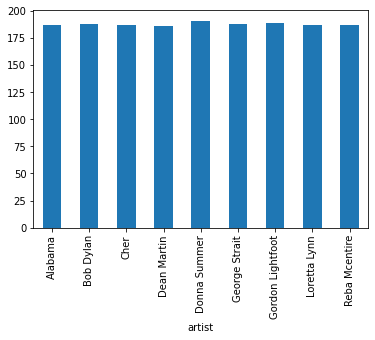

In [82]:
songdatatop=songdata[songdata['artist'].isin(artistlist)]
print(len(songdatatop))
songdatatop.groupby('artist')['song'].agg('count').plot.bar()

Great, nice and evenly distributed number of songs for each of the top artists. Time to get a baseline prediction.

**Task:** Make a train-test split with lyrics as input column and artist as target column. Split for 20% test size and fix random_state=42.

As always, we want to build a baseline first. 

**Task:** Compute the log loss and cross_val_score on the test set if for each song we predict the same probability for all the artists, i.e. each artists gets a probability of 10%. 

**Hint:** As we are dealing with a multi-class problem of 10 classes, we need to pass a len(X_test)x10 dimensional array as the prediction.

**Task:** Perform basic data cleaning by performing the following tasks:
  - convert text to lower case
  - remove special characters
  - remove double whitespace

**Task:** Build a pipeline consisting of a TFIDF vectorizer as well as a LogisticRegression. What's the log loss on the training and test set? Evaluate your predictions by looking at the mean of `cross_val_score` of that pipe.

**Hint:** You can use the helper function below

In [ ]:
from sklearn.metrics import log_loss

def predict_logloss_test_set(model, X_train, X_test, y_train, y_test):
  
  pred_train = model.predict_proba(X_train)
  pred_test = model.predict_proba(X_test)

  print(f"Logloss train set: {log_loss(y_train, pred_train): .4f}")
  print(f"Logloss test set: {log_loss(y_test, pred_test): .4f}")

**Task:** Use the internal stop word removal from the TfidfVectorizer stop_words="english".

to get rid of the stopwords. What's the effect on the logloss and cross_val_score?

That's interesting! Results get worse after deleting the stop words, i.e. there seems to be some information in the stopwords. If we had more time, we should now probably go ahead and check which stopwords this might be...

**Task:** Import and initialize nltk's SnowballStemmer and create a function that takes a string, stems every word and chain the stemmed words back together in one string to return it.

The SnowballStemmer works just like the PorterStemmer (`stem()` function) but because it works for multiple languages, it has to be initialized by giving a language string ([see documentation](https://www.nltk.org/api/nltk.stem.html#nltk.stem.snowball.SnowballStemmer)).

In [ ]:
# try function on this sentence:
sentence = "I need to leave because the leaves of these trees are spooky."

**Task:** Use your function with the pandas apply function, to stem the lyrics of each song. Put the result in a separate column of the dataframe.


**Task:** Run the Pipeline (w/o hyperparameter settings nor stop word removal) and print the logloss on the training and test set. As always, set random_state=42

**Task:** Run hyperparameter optimization for both the TfidfVectorizer and the Logistic Regression. Try the following parameters:
- max_features: [1000, 3000, None]
- max_df = [0.5, 0.7, 1]
- C = [0.7, 1, 2]

**Task (Bonus):** Plot the confusion matrix (in %) on the test set. Make sure the values are normalized, i.e. the sum over the predicted values per true label should be equal to 1.

 Use `plot_confusion_matrix` of sklearn to have a closer look at our predictions.

1. Fit your latest/best pipe to the training data, and 
1. Create the confusion matrix for the test data, and
1. Customize it by normalizing along 'true' values.


In [ ]:
from sklearn.metrics import plot_confusion_matrix


Even if we can't safely make prediction with this kind of an accuracy, we found out that some artists are more distinguishable than others in terms of their lyrics.

## Bonus

**Task**: 
We have seen that the default list of stopwords is no good. Let's make our own small list of stopwords.

To do that, we first need to find out **which words appear often**, because they may have a potentially bigger impact on our model, when treated as a stopword.

**Task:** Use sklearns CountVectorizer to make your corpus into a bag-of-words (i.e. fit_transform on your stemmed text data). Inspect the shape of your bag-of-words.

The second value in the shape is the number of columns in this matrix, or the **number of unique words** in the corpus.

**Task:** Take the sum of the entries in this matrix along **axis 0** (per column). Verify with the shape of the result that you have one value per word.

Doing this, you end up with  >8k  entries, one per word. The order of these entries corresponds to the order of the words in get_feature_names() from CountVectorizer.

Task: Use the given wordcount_np_array to create a pandas series and set its index to get_feature_names() from the CountVectorizer.

Display the 20 largest entries in this series.


In [ ]:
wordcount_np_array = np.array(bow.sum(axis=0))[0]

# Your code here:

Let's keep personal pronouns like "you" or "me", as well as "love", because they may hold more meaning in songs than we might think.

**Task:** Create your own stopword list and select 10 non-descriptive words from this list of top 20 words in your corpus.

**Task:** Split your data again as before, but use the stemmed text as input now.

Task: Recreate your pipeline and give the TfidfVectorizer your custom list of stopwords.

Re-evaluate this pipe with the mean of the cross_val_score.

**Bonus:** Use the `token_pattern` option of TfidfVectorizer and give it a regular expression that detects words such as "don't", "it's" and "we're". By default, any punctuation separates two words in this vectorizer.

Also increase the regularization parameter to `C=2` in the logistic regression and evaluate the pipe again.